In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import re
from numpy import asarray
from numpy import savez_compressed
from src.descargardataset import descargarDataset
from src.configuracion import PathTest,PathTraining
from src.renombrar import renombrarFrutas



### Preparo los datos de entrenamiento

In [48]:
clase,imagen_fruta = descargarDataset(PathTraining)
print((imagen_fruta.shape,clase.shape))

((70709, 35, 35, 3), (70709,))


In [169]:
print(np.unique(clase))

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Datil' 'Eggplant'
 'Ginger Root' 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White'
 'Grape White 2' 'Grape White 3' 'Grape White 4' 'Grapefruit Pink'
 'Grapefruit White' 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi'
 'Kohlrabi' 'Kumquats' 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine'
 'Mango' 'Mango Red' 'Mangostan' 'Maracuja' 'Melon Piel de Sapo'
 'Mulberry' 'Nectarine' 'Nectarine Flat' 'Nut Forest' 'Nut Pecan'
 'Onion Red' 'Onion Red Peeled' '

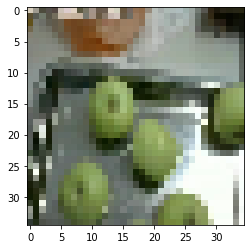

In [50]:
plt.imshow(imagen_fruta[5819])

In [51]:
print(clase)

['Cherry 1' 'Cherry 1' 'Cherry 1' ... 'Apricot' 'Apricot' 'Apricot']


### Renombrar las frutas 


In [141]:
nombre_frutas_corregido = np.array(renombrarFrutas(clase))
(nombre_frutas_corregido.shape)
print(len(np.unique(nombre_frutas_corregido)))


107


### Agrupo los nombres de las frutas

In [142]:
nombres_reducidos = [x.split()[0] for x in nombre_frutas_corregido] 
print(len(np.unique(nombres_reducidos)))

63


#### Voy a crear una etiqueta para cada fruta

In [131]:
nombres_fruta ={elemento:indice for indice,elemento in enumerate(np.unique(nombres_reducidos))}
display(nombres_fruta)

{'Apple': 0,
 'Apricot': 1,
 'Avocado': 2,
 'Banana': 3,
 'Beetroot': 4,
 'Blueberry': 5,
 'Cactus': 6,
 'Cantaloupe': 7,
 'Carambula': 8,
 'Cauliflower': 9,
 'Cherry': 10,
 'Chestnut': 11,
 'Clementine': 12,
 'Cocos': 13,
 'Datil': 14,
 'Eggplant': 15,
 'Ginger': 16,
 'Granadilla': 17,
 'Grape': 18,
 'Grapefruit': 19,
 'Guava': 20,
 'Hazelnut': 21,
 'Huckleberry': 22,
 'Kaki': 23,
 'Kiwi': 24,
 'Kohlrabi': 25,
 'Kumquats': 26,
 'Lemon': 27,
 'Limes': 28,
 'Lychee': 29,
 'Mandarine': 30,
 'Mango': 31,
 'Mangostan': 32,
 'Maracuja': 33,
 'Melon': 34,
 'Mulberry': 35,
 'Nectarine': 36,
 'Nut': 37,
 'Onion': 38,
 'Orange': 39,
 'Papaya': 40,
 'Passion': 41,
 'Peach': 42,
 'Pear': 43,
 'Pepino': 44,
 'Pepper': 45,
 'Physalis': 46,
 'Pineapple': 47,
 'Pitahaya': 48,
 'Plum': 49,
 'Pomegranate': 50,
 'Pomelo': 51,
 'Potato': 52,
 'Quince': 53,
 'Rambutan': 54,
 'Raspberry': 55,
 'Redcurrant': 56,
 'Salak': 57,
 'Strawberry': 58,
 'Tamarillo': 59,
 'Tangelo': 60,
 'Tomato': 61,
 'Walnut': 62}

In [132]:
etiqueta_fruta = np.array([nombres_fruta[x] for x in nombres_reducidos])
etiqueta_fruta.shape,imagen_fruta.shape

((70709,), (70709, 35, 35, 3))

## Preparo los datos para el test


### Descargo el dataset de test

In [147]:
test_clase,test_imagenes = descargarDataset(PathTest)

In [148]:
test_clase.shape,test_imagenes.shape

((20624,), (20624, 35, 35, 3))

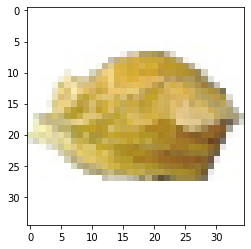

In [149]:
plt.imshow(test_imagenes[6000])


### Renombrar el nombre de las frutas


In [154]:
test_clase_corregido = renombrarFrutas(test_clase)
print(np.unique(test_clase_corregido))

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden '
 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red ' 'Apple Red Delicious'
 'Apple Red Yellow ' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe ' 'Carambula' 'Cauliflower' 'Cherry ' 'Cherry Rainier'
 'Cherry Wax Black' 'Cherry Wax Red' 'Cherry Wax Yellow' 'Chestnut'
 'Clementine' 'Cocos' 'Datil' 'Eggplant' 'Ginger Root' 'Granadilla'
 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White ' 'Grapefruit Pink'
 'Grapefruit White' 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi'
 'Kohlrabi' 'Kumquats' 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine'
 'Mango' 'Mango Red' 'Mangostan' 'Maracuja' 'Melon Piel de Sapo'
 'Mulberry' 'Nectarine' 'Nectarine Flat' 'Nut Forest' 'Nut Pecan'
 'Onion Red' 'Onion Red Peeled' 'Onion White' 'Orange' 'Papaya'
 'Passion Fruit' 'Peach' 'Peach ' 'Peach Flat' 'Pear' 'Pear Abate'
 'Pear Forelle' 'Pear Kaiser' 'Pear Monster' 'Pear 

In [156]:
nombres_reducidos_testeo = [x.split()[0] for x in test_clase_corregido] 
print(len(np.unique(nombres_reducidos_testeo)))
len(nombres_reducidos_testeo)

63


20624

#### Voy a crear una etiqueta para cada fruta

In [161]:
nombres_fruta_testeo ={elemento:indice for indice,elemento in enumerate(np.unique(nombres_reducidos_testeo))}
test_etiqueta = np.array([nombres_fruta_testeo[x] for x in nombres_reducidos_testeo])
test_etiqueta.shape


(20624,)

In [162]:
print(test_clase.shape,test_imagenes.shape,test_etiqueta.shape)

(20624,) (20624, 35, 35, 3) (20624,)


### Creamos unos archivos con los datos terminados


In [189]:
lista_archivos_guardar = ["test_imagenes","test_etiqueta","etiqueta_fruta","imagen_fruta"]
np.save(f'./Input/test_etiqueta', test_etiqueta)
np.save(f'./Input/etiqueta_fruta', etiqueta_fruta)
np.save(f'./Input/imagen_fruta', imagen_fruta)
np.save(f'./Input/test_imagenes', test_imagenes)
np.save(f'./Input/test_clase_corregido', test_clase_corregido)

np.save(f'./Input/nombre_frutas_corregido', nombres_fruta)

In [271]:
df=pd.DataFrame(nombres_fruta,index=[0])
df.to_csv("./Input/nombre_Frutas.csv",index=False)